<a href="https://colab.research.google.com/github/gustavoamora/patter_recognition_and_machine_learningning/blob/main/aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [59]:
set(y)

{0, 1, 2}

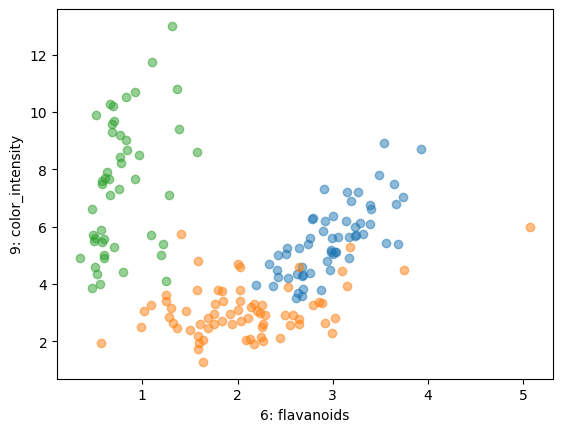

In [60]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [61]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [62]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [63]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.18255615e-04, 1.14202499e-04, 8.24928284e-05, 7.29560852e-05,
        5.69820404e-05]),
 'score_time': array([0.0023005 , 0.00223851, 0.00154066, 0.00132108, 0.00137186]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[15,  1,  3],
       [ 0, 16,  2],
       [ 0,  5, 12]])

In [65]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.796078431372549

In [66]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [67]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([1.24454498e-04, 9.44137573e-05, 9.89437103e-05, 9.51290131e-05,
        8.65459442e-05]),
 'score_time': array([0.00585604, 0.00513768, 0.00333524, 0.00307941, 0.00320458]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [68]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([7.10487366e-05, 6.62803650e-05, 8.79764557e-05, 8.15391541e-05,
        6.34193420e-05]),
 'score_time': array([0.00354242, 0.00349879, 0.00678897, 0.00324392, 0.00318909]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [69]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([7.20024109e-05, 7.20024109e-05, 6.79492950e-05, 6.48498535e-05,
        6.34193420e-05, 6.10351562e-05, 6.27040863e-05, 6.24656677e-05,
        5.96046448e-05, 9.60826874e-05, 6.58035278e-05, 6.69956207e-05,
        7.12871552e-05, 6.53266907e-05, 6.72340393e-05, 6.38961792e-05,
        6.50882721e-05, 6.34193420e-05, 6.29425049e-05, 7.00950623e-05,
        6.03199005e-05, 6.10351562e-05, 5.76972961e-05, 8.77380371e-05,
        9.75131989e-05, 9.70363617e-05, 1.03235245e-04, 6.67572021e-05,
        6.48498535e-05, 7.60555267e-05, 6.55651093e-05, 7.86781311e-05,
        6.50882721e-05, 6.46114349e-05, 6.22272491e-05, 6.22272491e-05,
        5.57899475e-05, 5.57899475e-05, 7.29560852e-05, 5.96046448e-05,
        5.76972961e-05, 5.74588776e-05, 7.00950623e-05, 6.03199005e-05,
        6.00814819e-05, 5.74588776e-05, 5.93662262e-05, 5.88893890e-05,
        5.88893890e-05, 6.98566437e-05]),
 'score_time': array([0.00938559, 0.00539708, 0.00463724, 0.00460386, 0.00465131,


In [70]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [71]:
modelo.intercept_

array([-105.,  114.,   19.])

In [72]:
modelo.coef_[:,[6,9]]

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

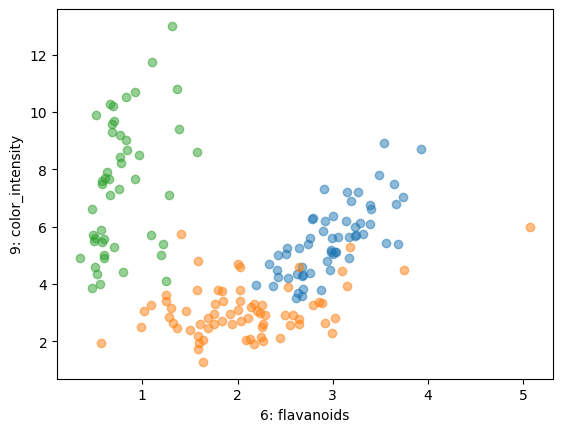

In [73]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

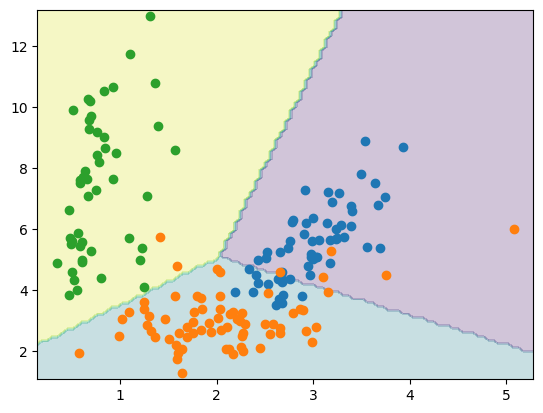

In [74]:
import matplotlib.pyplot as plt
import numpy as np

X69 = X[:,[6, 9]]
modelo.fit(X69, y)

x6s = np.linspace(np.min(X[:, 6]) - 0.2, np.max(X[:, 6]) + 0.2, 100)
x9s = np.linspace(np.min(X[:, 9]) - 0.2, np.max(X[:, 9]) + 0.2, 100)
x6, x9 = np.meshgrid(x6s, x9s)

Xdec = np.c_[x6.ravel(), x9.ravel()]

ypred = modelo.predict(Xdec)
plt.contourf(x6, x9, ypred.reshape(x6.shape), alpha=0.25)

for k in set(y):
  plt.plot(X[:,6][y==k], X[:,9][y==k], 'o')

plt.show()

In [79]:
# Funcão separadores hiperplano:

def plot_hyperplane(X, coef, intercept, class_label, color='black'):
    def line(x0):
        return (-(x0 * coef[class_label, 0]) - intercept[class_label]) / coef[class_label, 1]

    xmin = min(X[:, 0])
    xmax = max(X[:, 0])
    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="-", color=color)

0.8764044943820225


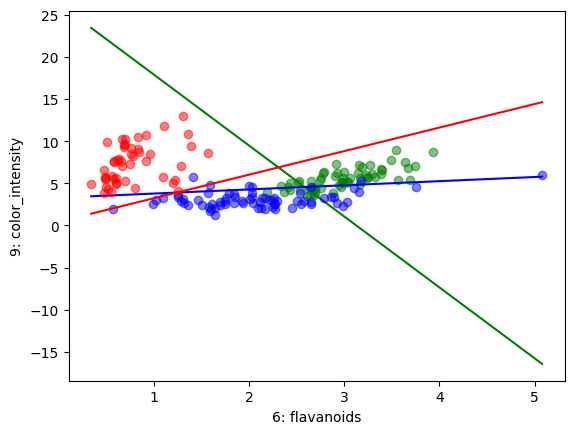

In [83]:
# Plot retas separadoras:

modelo.fit(X69, y)
print(sum(modelo.predict(X69) == y) / len(y))
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
colors = ['green', 'blue', 'red']
for k in set(y):
    plt.plot(X[:, i][y == k], X[:, j][y == k], "o", alpha=0.5, color=colors[k])
    plot_hyperplane(X69, modelo.coef_, modelo.intercept_, k, colors[k])
plt.show()